In [538]:
import pandas as pd
import torch
import PIL.Image
from torchvision import transforms
import  numpy as np
import  torch
import torchvision
import torch.nn.functional as F
from torch import  nn
from torch import optim
import math

# 数据集预处理

datasets name is 'train'


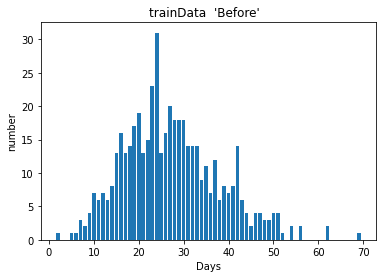

In [539]:
# data_file = "C:\Users\lzwDT\PycharmProjects\corona_days\afterCoronaHospital.csv"

train = pd.read_csv(r'C:\Users\lzwDT\PycharmProjects\corona_days\afterCoronaHospital.csv')

# redefine the type error of the 'to_csv'(mainly about int to obeject)
col_dict = {'init_volume_sum':float,
            'is_Emphysema':str,
            'is_Atelectasis':str,
            'degreeOfAlveolarConsolidation':str,
            'is_fibrotic_lesions':str,
            'is_noduleMass':str,
            'is_hollowCavity':str,
            'is_calcification':str,
            'is_pleuralEffusion':str,
            'is_pleuralThickeningAdhesiveCalcification':str,
            'degreeOfBoneHyperplasia':str}
convert_column_name = list(col_dict.keys())
convert_column_name.pop(0)
train[convert_column_name] = train[convert_column_name].astype('int32').astype('object')
print(f'datasets name is \'train\'')


#Analysis the data distribution about label 'Before'
import matplotlib.pyplot as plt

train_visual = train
train_result = train_visual.groupby('day_hospitalized').size()
plt.bar(list(train_result.index),train_result)
plt.xlabel('Days')
plt.ylabel('number')
plt.title('trainData  \'Before\'  ')
plt.show()

In [540]:
train = train[train.day_hospitalized < 50]
train = train[train.day_hospitalized > 10]

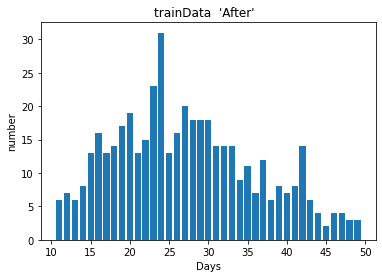

In [541]:
#Analysis the data distribution about label 'After'
train_visual = train
train_result = train_visual.groupby('day_hospitalized').size()
plt.bar(list(train_result.index),train_result)
plt.xlabel('Days')
plt.ylabel('number')
plt.title('trainData  \'After\'  ')
plt.show()

In [542]:

train = train.reset_index()
del train['index']

c:\Users\lzwDT\anaconda3\envs\bilitorch\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


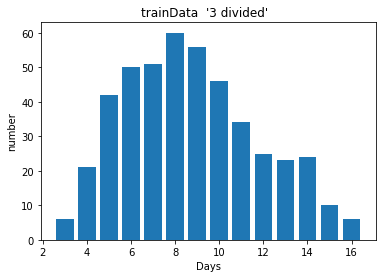

In [543]:
train['day_divided 3'] = 42
for x in range(train.shape[0]):
    train['day_divided 3'][x] = train['day_hospitalized'][x] / 3

# visualization
#Analysis the data distribution about label 'divided 3'
train_visual = train
train_result = train_visual.groupby('day_divided 3').size()
plt.bar(list(train_result.index),train_result)
plt.xlabel('Days')
plt.ylabel('number')
plt.title('trainData  \'3 divided\'  ')
plt.show()

# train.to_csv('datasets\corona_unit3.csv',index=False)

In [544]:
train

,init_volume_sum,init_volume_sum_per,init_avg_volume,final_volume_sum,final_volume_sum_per,final_avg_volume,is_Emphysema,is_Atelectasis,degreeOfAlveolarConsolidation,is_fibrotic_lesions,...,T9_BMD,T10_BMD,T11_BMD,T12_BMD,degreeOfBoneHyperplasia,SAT,VAT,averageLiverFat,day_hospitalized,day_divided 3
0,50.39,0.86,-618.0,119.45,1.94,-769.0,0,0,1,1,...,0.00,0.00,0.00,0.00,0,0.0,0.0,0.0,32,10
1,0.00,0.00,0.0,0.00,0.00,0.0,0,0,0,0,...,0.00,0.00,0.00,0.00,0,0.0,0.0,0.0,24,8
2,0.00,0.00,0.0,0.00,0.00,0.0,0,0,1,1,...,220.21,233.70,216.50,203.00,1,20.7,14.9,11.0,11,3
3,934.43,53.07,-337.0,115.77,5.38,-691.0,0,0,3,1,...,92.00,102.06,94.87,111.52,2,112.8,157.8,20.1,33,11
4,30.96,0.79,-615.0,35.88,0.98,-441.0,0,0,1,1,...,177.65,188.54,179.58,169.43,0,75.3,32.9,7.5,27,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,0.00,0.00,0.0,0.00,0.00,0.0,0,0,0,0,...,118.34,129.27,128.64,130.64,0,72.1,149.2,19.8,21,7
450,1.89,0.04,-762.0,0.00,0.00,0.0,0,0,1,1,...,173.90,177.60,174.80,177.70,0,53.4,68.7,6.5,37,12
451,0.00,0.00,0.0,0.00,0.00,0.0,0,0,0,0,...,171.00,168.60,154.20,160.20,1,49.7,118.3,19.5,37,12
452,0.00,0.00,0.0,0.00,0.00,0.0,0,0,0,0,...,169.70,160.20,158.40,164.30,0,54.5,40.4,6.6,38,12


In [545]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(
    train,train['day_divided 3'], test_size=0.2, random_state=None)
X_train = x_train
X_test = x_test
x_train.shape,y_train.shape,x_test.shape,y_test.shape


x_train = x_train.iloc[:,:-2].astype(float)
# y_train = y_train.astype(float)
x_test = x_test.iloc[:,:-2].astype(float)
# y_test = y_test.astype(float)


In [546]:
y_train

429     7
315     6
98      6
131    14
142     4
       ..
143     6
227    14
296     9
418    10
274     9
Name: day_divided 3, Length: 363, dtype: int64

In [547]:
#输入
x_train = torch.tensor(x_train.values)
x_test = torch.tensor(x_test.values)
#输出
y_train = torch.tensor(y_train.values)
y_test = torch.tensor(y_test.values)

data_dim = x_train.shape[1]
# target_dim = target.shape[1]
# print(data)
# print(data.shape)
print(data_dim,x_train.shape)



50 torch.Size([363, 50])


## 定义Dataset

In [548]:
from torch.utils.data import Dataset


class LungDataset(Dataset):

    def __init__(self,inputs,outputs):
        self.inputs = inputs
        self.outputs = outputs

    def __getitem__(self, idx):
        vector = self.inputs[idx]
        label = self.outputs[idx]
        return vector,label

    def __len__(self):
        return len(self.outputs)

trainDataset = LungDataset(x_train,y_train)
testDataset = LungDataset(x_test,y_test)
x,y = trainDataset[0]
x.shape,
y_train.unique().sum()



tensor(133)

## 随机种子


# 搭建网络

In [549]:
class MnistNet(nn.Module):
    def __init__(self):
        super(MnistNet,self).__init__()
        self.fc1 = nn.Linear(data_dim*1,17)  #定义Linear的输入和输出的形状
        self.fc2 = nn.Linear(17,133)  #定义Linear的输入和输出的形状

    def forward(self,x):
        x = x.view(-1,data_dim*1)  #对数据形状变形，-1表示该位置根据后面的形状自动调整
        x = self.fc1(x) #[batch_size,28]

        # x = F.relu(x)  #[batch_size,28]
        # x = self.fc1_1(x) #[batch_size,10]

        x = F.relu(x)  #[batch_size,28]
        x = self.fc2(x) #[batch_size,10]
        return F.log_softmax(x, dim=-1)

In [550]:

# train_dataloader = torch.utils.data.DataLoader(data,batch_size=64,shuffle=True)

### 损失函数

In [551]:
import torch
from torch.nn.modules.loss import _Loss
import torch.nn.functional as F
import json


class BalancedSoftmax(_Loss):
    """
    Balanced Softmax Loss
    """
    def __init__(self, freq_path):
        super(BalancedSoftmax, self).__init__()
        with open(freq_path, 'r') as fd:
            freq = json.load(fd)
        freq = torch.tensor(freq)
        self.sample_per_class = freq

    def forward(self, input, label, reduction='mean'):
        return balanced_softmax_loss(label, input, self.sample_per_class, reduction)


def balanced_softmax_loss(labels, logits, sample_per_class, reduction):
    """Compute the Balanced Softmax Loss between `logits` and the ground truth `labels`.
    Args:
      labels: A int tensor of size [batch].
      logits: A float tensor of size [batch, no_of_classes].
      sample_per_class: A int tensor of size [no of classes].
      reduction: string. One of "none", "mean", "sum"
    Returns:
      loss: A float tensor. Balanced Softmax Loss.
    """
    spc = sample_per_class.type_as(logits)

    spc = spc.unsqueeze(0).expand(logits.shape[0], -1)

    logits = logits + spc.log()

    loss = F.cross_entropy(input=logits, target=labels, reduction=reduction)
    return loss


def create_loss(freq_path):
    print('Loading Balanced Softmax Loss.')
    return BalancedSoftmax(freq_path)

# 准备迭代器

In [552]:
train_batch_size = 50
test_batch_size = 50
img_size = data_dim

def get_dataloader(train=True):
    dataset = trainDataset if train else testDataset
    #准备数据迭代器
    batch_size = train_batch_size if train else test_batch_size
    dataloader = torch.utils.data.DataLoader(dataset,batch_size=batch_size,shuffle=True)
    return dataloader

# 训练

In [553]:
mnist_net = MnistNet().double()
optimizer = optim.Adam(mnist_net.parameters(),lr= 0.001)
train_loss_list = []
train_count_list = []
def train(epoch):
    mnist_net.train(True)
    train_dataloader = get_dataloader(True)
    optimizer.zero_grad()
    print("开始训练：")
    for idx,(data,target) in enumerate(train_dataloader):
        output = mnist_net(data)
        # loss = F.cross_entropy(output,target) #对数似然损失
        loss = F.nll_loss(output,target) #对数似然损失
        # loss = balanced_softmax_loss(labels = target, logits=output, reduction='mean', sample_per_class=train_tensor_class_num_list)
        loss.backward()
        optimizer.step()
        if idx % 200 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(epoch,  idx * len(data), len(train_dataloader.dataset),100. * idx / len(train_dataloader), loss.item()))
            train_loss_list.append(loss.item())
            train_count_list.append(idx*train_batch_size+(epoch-1)*len(train_dataloader))
    print("结束训练。")



In [554]:
def acc_train():
    test_loss = 0
    correct = 0
    mnist_net.eval()
    test_dataloader = get_dataloader(train=True)
    with torch.no_grad():
        for data, target in test_dataloader:
            output = mnist_net(data)
            test_loss += F.nll_loss(output, target, reduction='mean').item()
            pred = output.data.max(1, keepdim=True)[1] #获取最大值的位置,[batch_size,1]
            correct += pred.eq(target.data.view_as(pred)).sum()
    test_loss /= len(test_dataloader.dataset)

    print('\nTrain set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_dataloader.dataset),
        100. * correct / len(test_dataloader.dataset)))
    correct_rate = 100. * correct / len(test_dataloader.dataset)
    return correct_rate

# 测试

In [555]:
def test():
    test_loss = 0
    correct = 0
    mnist_net.eval()
    test_dataloader = get_dataloader(train=False)
    with torch.no_grad():
        for data, target in test_dataloader:
            output = mnist_net(data)
            test_loss += F.nll_loss(output, target, reduction='mean').item()
            pred = output.data.max(1, keepdim=True)[1] #获取最大值的位置,[batch_size,1]
            correct += pred.eq(target.data.view_as(pred)).sum()


    test_loss /= len(test_dataloader.dataset)
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_dataloader.dataset),
        100. * correct / len(test_dataloader.dataset)))
    test_correct = 100. * correct / len(test_dataloader.dataset)
    return test_correct,test_loss

In [556]:
from matplotlib import pyplot as plt
import PIL
epoch = 40000
#定义两个数组
Loss_list = []
Accuracy_list = []
test_Loss_list = []
test_Accuracy_list = []
# 训练
for i in range(epoch):
    train(i)
    correct_rate = acc_train()
    # Loss_list.append(c)
    Accuracy_list.append(correct_rate)

    test_correct,test_loss = test()
    test_Accuracy_list.append(test_correct)
    test_Loss_list.append(test_loss)





Loss_list = train_loss_list

#我这里迭代了200次，所以x的取值范围为(0，200)，然后再将每次相对应的准确率以及损失率附在x上
x1 = range(0, epoch)
x2 = range(0, epoch)
y1 = Accuracy_list
y2 = Loss_list
plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'o-')
plt.title('Train accuracy vs. epoches')
plt.ylabel('Train accuracy')
plt.subplot(2, 1, 2)
plt.plot(x2, y2, '.-')
plt.xlabel('Train loss vs. epoches')
plt.ylabel('Train loss')
plt.savefig("accuracy_loss.jpg")
plt.show()

x1 = range(0, epoch)
x2 = range(0, epoch)
y1 = test_Accuracy_list
y2 = test_Loss_list
plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'o-')
plt.title('test accuracy vs. epoches')
plt.ylabel('test accuracy')
plt.subplot(2, 1, 2)
plt.plot(x2, y2, '.-')
plt.xlabel('test loss vs. epoches')
plt.ylabel('test loss')
plt.savefig("test_accuracy_loss.jpg")
plt.show()


开始训练：
Train Epoch: 0 [0/363 (0%)]	Loss: 839.240567
结束训练。

Train set: Avg. loss: 16.6822, Accuracy: 0/363 (0.00%)


Test set: Avg. loss: 16.4366, Accuracy: 0/91 (0.00%)

开始训练：
Train Epoch: 1 [0/363 (0%)]	Loss: 694.998503
结束训练。

Train set: Avg. loss: 12.9195, Accuracy: 0/363 (0.00%)


Test set: Avg. loss: 12.8126, Accuracy: 0/91 (0.00%)

开始训练：
Train Epoch: 2 [0/363 (0%)]	Loss: 579.119562
结束训练。

Train set: Avg. loss: 9.6565, Accuracy: 1/363 (0.28%)


Test set: Avg. loss: 9.4569, Accuracy: 0/91 (0.00%)

开始训练：
Train Epoch: 3 [0/363 (0%)]	Loss: 450.339213
结束训练。

Train set: Avg. loss: 7.1744, Accuracy: 4/363 (1.10%)


Test set: Avg. loss: 7.0170, Accuracy: 0/91 (0.00%)

开始训练：
Train Epoch: 4 [0/363 (0%)]	Loss: 337.194442
结束训练。

Train set: Avg. loss: 5.4669, Accuracy: 8/363 (2.20%)


Test set: Avg. loss: 5.1752, Accuracy: 1/91 (1.10%)

开始训练：
Train Epoch: 5 [0/363 (0%)]	Loss: 249.260027
结束训练。

Train set: Avg. loss: 4.0974, Accuracy: 21/363 (5.79%)


Test set: Avg. loss: 3.7734, Accuracy: 7/91 (7

KeyboardInterrupt: 

In [ ]:
test()


Test set: Avg. loss: 0.0676, Accuracy: 10/91 (10.99%)



(tensor(10.9890), 0.06758222405849913)

In [ ]:
import shap

explainer = shap.DeepExplainer(mnist_net, torch.from_numpy(X_train.values).double())
shap_values = explainer.shap_values(torch.from_numpy(X_test.values).double())
shap.summary_plot(shap_values, X_test, plot_type='bar')

AttributeError: module 'numba' has no attribute 'core'

In [ ]:
torch.save(mnist_net.state_dict(),"../mnist_net.pt") #保存模型参数
torch.save(optimizer.state_dict(), '../mnist_optimizer.pt') #保存优化器参数

In [ ]:
mnist_net.load_state_dict(torch.load("../mnist_net.pt"))
optimizer.load_state_dict(torch.load("../mnist_optimizer.pt"))